Top 30 features saved to 'best_features_RF.csv'.


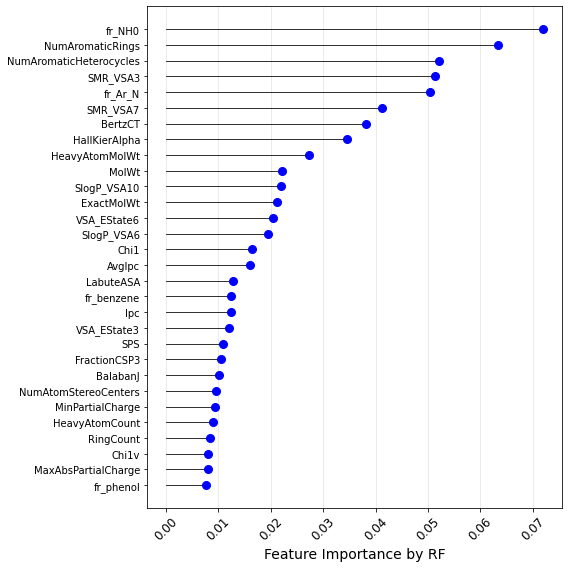

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, matthews_corrcoef, balanced_accuracy_score
)


# Step 1: Read and prepare the data 
df = pd.read_csv('merged_output.csv') #change the input file path if needed 
X = df.drop(['Label', 'SMILES'], axis=1)
y = df.iloc[:, -1].values

X = X.dropna()  # Drop rows with NaN
y = y[X.index]  # Keep labels aligned with X

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Scale numerical features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 2: Train the model on all features
classifier = RandomForestClassifier(
    n_estimators=300, random_state=0, bootstrap=False,
    max_depth=None, max_features='sqrt',
    min_samples_leaf=1, min_samples_split=2
)
classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save top 30 features to CSV
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]
importance_top_30.to_csv('best_features_RF.csv', index=False)
print("Top 30 features saved to 'best_features_RF.csv'.")

# Visualize the top 30 features' importance with thin lines and big dots
plt.figure(figsize=(8, 8))  # Compress horizontally by reducing width

for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)  # Thin horizontal line
    plt.plot(importance, i, 'bo', markersize=8)  # Big blue dot at the end

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.xlabel('Feature Importance by RF', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Tilt x-axis labels by 45 degrees
plt.grid(axis='x', alpha=0.3)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig(
    'feature_importance.png',
    dpi=600,  # High resolution
    format='png',
    pil_kwargs={"optimize": True}  # Compression for smaller file size
)

plt.show()


/U1/accounts/kmonda1/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Top 30 features saved to 'best_features_XGBoost.csv'.


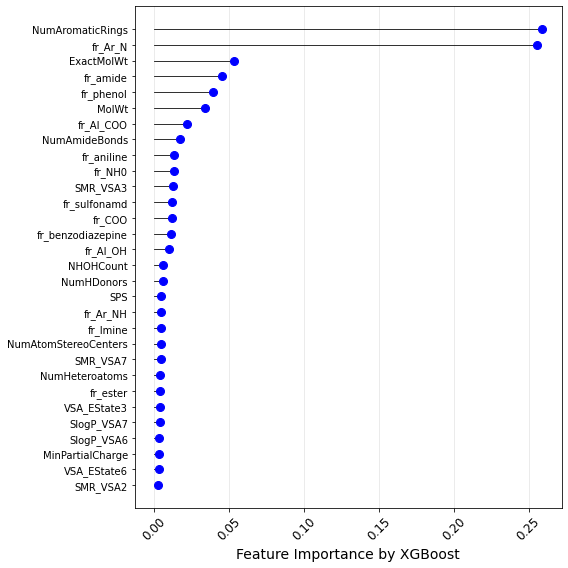

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, matthews_corrcoef, balanced_accuracy_score
)

# Step 1: Read and prepare the data
df = pd.read_csv('merged_output.csv') #change the input file path if needed 
X = df.drop(['Label', 'SMILES'], axis=1)
y = df.iloc[:, -1].values

X = X.dropna()  # Drop rows with NaN
y = y[X.index]  

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Scale numerical features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 2: Train the XGBoost model with specified hyperparameters
classifier = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.2,
    colsample_bytree=0.8,
    subsample=0.6,
    gamma=0
)
classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save the top 30 features to CSV
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]
importance_top_30.to_csv('best_features_XGBoost.csv', index=False)
print("Top 30 features saved to 'best_features_XGBoost.csv'.")

# Visualize the top 30 features' importance with thin lines and big dots
plt.figure(figsize=(8, 8))  # Compress horizontally by reducing width
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)  # Thin horizontal line
    plt.plot(importance, i, 'bo', markersize=8)  # Big blue dot at the end

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.xlabel('Feature Importance by XGBoost', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Tilt x-axis labels by 45 degrees
plt.grid(axis='x', alpha=0.3)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig(
    'feature_importance_xgboost.png',
    dpi=600,  # High resolution
    format='png',
    pil_kwargs={"optimize": True}  # Compression for smaller file size
)

plt.show()


Top 30 features saved to 'best_features_NN.csv'.


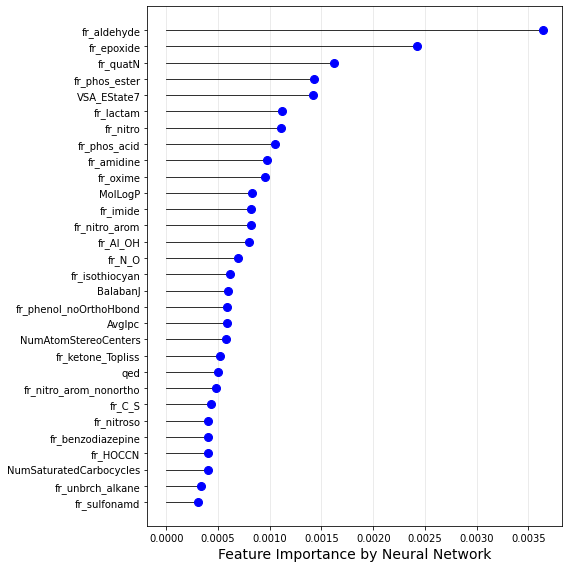

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Dataset

# Step 1: Load data
df = pd.read_csv('merged_output.csv') #change the input file path if needed 
X = df.drop(['Label', 'SMILES'], axis=1)
y = df['Label']

X = X.dropna()
y = y[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Dataset
class CSVDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets.values.astype('float32')

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return {
            'features': torch.tensor(self.features[idx], dtype=torch.float32),
            'targets': torch.tensor(self.targets[idx], dtype=torch.float32)
        }

# Define Neural Network
class MLP(nn.Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(n_inputs, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))
        return x.view(-1)

# Train the model
def train_model(train_dl, model, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        for batch in train_dl:
            inputs, targets = batch['features'], batch['targets']
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

# Compute feature importances
def compute_feature_importances(model, X, features):
    model.eval()
    with torch.no_grad():
        baseline = model(torch.tensor(X, dtype=torch.float32)).mean().item()
        importances = []
        for col_idx in range(X.shape[1]):
            X_copy = X.copy()
            np.random.shuffle(X_copy[:, col_idx])
            permuted_output = model(torch.tensor(X_copy, dtype=torch.float32)).mean().item()
            importances.append(baseline - permuted_output)
    return pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

# Prepare data for PyTorch
train_dataset = CSVDataset(X_train, y_train)
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize and train model
n_inputs = X_train.shape[1]
model = MLP(n_inputs)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_model(train_dl, model, criterion, optimizer, epochs=50)

# Compute feature importances
importance_df = compute_feature_importances(model, X_train, X.columns)

# Save top 30 features to CSV
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]
importance_top_30.to_csv('best_features_NN.csv', index=False)
print("Top 30 features saved to 'best_features_NN.csv'.")
# Plot top 30 features
plt.figure(figsize=(8, 8))
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)
    plt.plot(importance, i, 'bo', markersize=8)

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance by Neural Network', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Save plot as high-resolution PNG
plt.tight_layout()
plt.savefig('feature_importance_nn.png', dpi=600, format='png', pil_kwargs={"optimize": True})
plt.show()



Processing kernel: sigmoid
Top 30 features saved to top_30_features_svr_sigmoid.csv
Feature importance plot saved to top_30_svr_sigmoid_importance.png


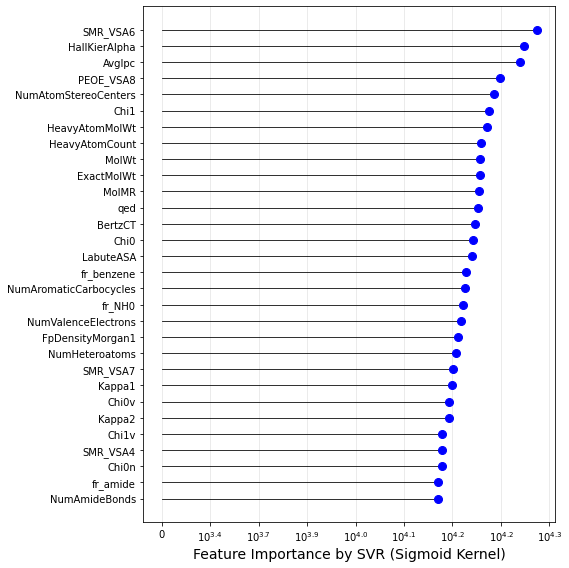

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load and preprocess data
df = pd.read_csv('merged_output.csv')#change the input file path if needed 
X = df.drop(['Label', 'SMILES'], axis=1)  
y = df.iloc[:, -1].values

X = X.dropna()
y = y[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print("\nProcessing kernel: sigmoid")

# Train SVR model 
model = SVR(kernel='sigmoid', C=10, gamma=0.1)  
model.fit(X_train, y_train)

# Compute feature importance using model coefficients
importance_values = np.abs(model.dual_coef_.dot(model.support_vectors_)).sum(axis=0)
importance_df = pd.DataFrame({
    'Feature': df.drop(['Label', 'SMILES'], axis=1).columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Extract top 30 features
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]

# Save top 30 features to CSV
csv_filename = 'top_30_features_svr_sigmoid.csv'
importance_top_30.to_csv(csv_filename, index=False, float_format='%.6e')
print(f"Top 30 features saved to {csv_filename}")

# Plot top 30 features
plt.figure(figsize=(8, 8))
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)
    plt.plot(importance, i, 'bo', markersize=8)  # Blue markers

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance by SVR (Sigmoid Kernel)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"$10^{{{np.log10(x):.1f}}}$" if x > 0 else "0"))  # Exponential format
plt.tight_layout()

# Save plot
plot_filename = 'top_30_svr_sigmoid_importance.png'
plt.savefig(plot_filename, dpi=600)
print(f"Feature importance plot saved to {plot_filename}")
plt.show()



Processing kernel: rbf
Top 30 features saved to top_30_features_svr_rbf.csv
Feature importance plot saved to top_30_svr_rbf_importance.png


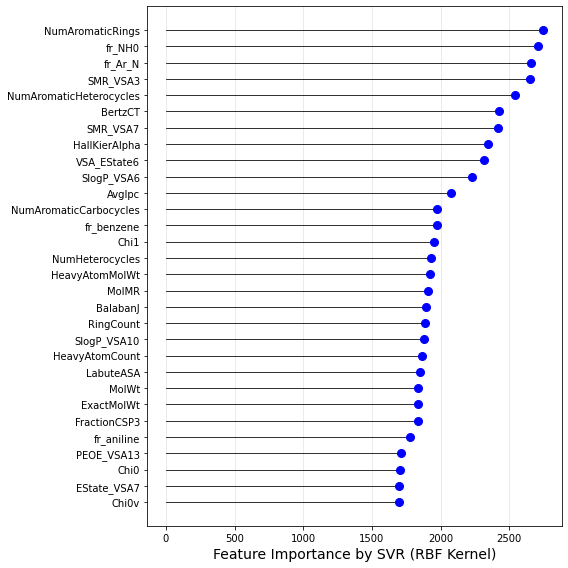

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load and preprocess data
df = pd.read_csv('merged_output.csv')#change the input file path if needed 
X = df.drop(['Label', 'SMILES'], axis=1)
y = df.iloc[:, -1].values

X = X.dropna()
y = y[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Optimize SVR computation with sigmoid kernel
print("\nProcessing kernel: rbf")

# Train SVR model with gamma and C tuning
model = SVR(kernel='rbf', C=10, gamma=0.1)  # Optimized parameters
model.fit(X_train, y_train)

# Compute feature importance using model coefficients
importance_values = np.abs(model.dual_coef_.dot(model.support_vectors_)).sum(axis=0)
importance_df = pd.DataFrame({
    'Feature': df.drop(['Label', 'SMILES'], axis=1).columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Extract top 30 features
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]

# Save top 30 features to CSV
csv_filename = 'top_30_features_svr_rbf.csv'
importance_top_30.to_csv(csv_filename, index=False, float_format='%.6e')
print(f"Top 30 features saved to {csv_filename}")

# Plot top 30 features
plt.figure(figsize=(8, 8))
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)
    plt.plot(importance, i, 'bo', markersize=8)  # Blue markers

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance by SVR (RBF Kernel)', fontsize=14)  # ← Updated kernel name here too
plt.grid(axis='x', alpha=0.3)
# Removed exponential formatter for normal decimal axis
plt.tight_layout()

# Save plot
plot_filename = 'top_30_svr_rbf_importance.png'  # ← Also fix filename to match kernel
plt.savefig(plot_filename, dpi=600)
print(f"Feature importance plot saved to {plot_filename}")
plt.show()




Processing kernel: Linear
Top 30 features saved to top_30_features_svr_linear.csv
Feature importance plot saved to top_30_svr_linear_importance.png


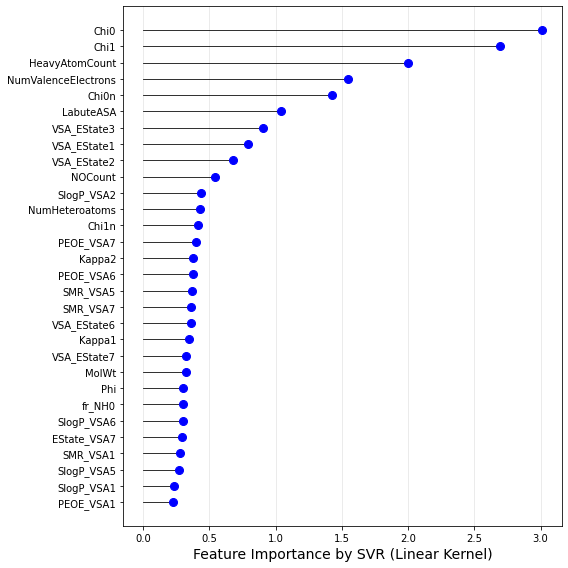

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load and preprocess data
df = pd.read_csv('merged_output.csv')#change the input file path if needed 

# Drop non-feature columns 
X = df.drop(['Label', 'SMILES'], axis=1)
y = df['Label'].values  

# Remove rows with missing values in X
X = X.dropna()
y = y[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model with linear kernel
print("\nProcessing kernel: Linear")
model = SVR(kernel='linear', C=10)
model.fit(X_train, y_train)

# Compute feature importance using model.coef_ (available for linear kernel only)
importance_values = np.abs(model.coef_).flatten()

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Extract top 30 features
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]

# Save top 30 features to CSV
csv_filename = 'top_30_features_svr_linear.csv'
importance_top_30.to_csv(csv_filename, index=False, float_format='%.6e')
print(f"Top 30 features saved to {csv_filename}")

# Plot top 30 features
plt.figure(figsize=(8, 8))
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)
    plt.plot(importance, i, 'bo', markersize=8)

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance by SVR (Linear Kernel)', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Use plain decimal formatting for x-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

# Save plot
plot_filename = 'top_30_svr_linear_importance.png'
plt.savefig(plot_filename, dpi=600)
print(f"Feature importance plot saved to {plot_filename}")
plt.show()



Processing kernel: Polynomial
Top 30 features saved to top_30_features_svr_poly.csv
Feature importance plot saved to top_30_svr_poly_importance.png


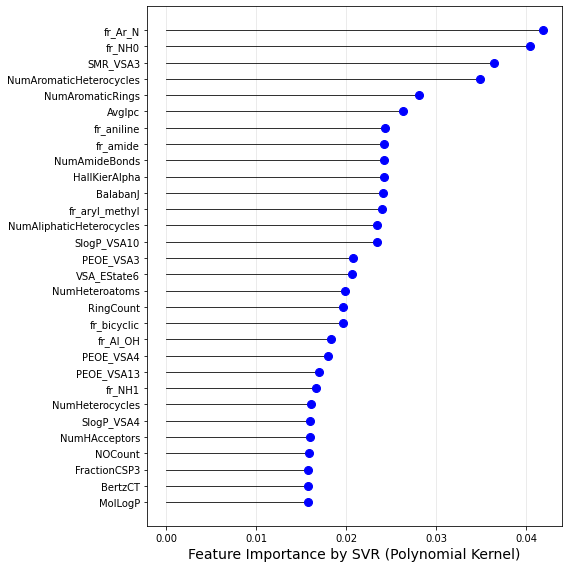

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


df = pd.read_csv('merged_output.csv') #change the input file path if needed 


X = df.drop(['Label', 'SMILES'], axis=1)
y = df['Label'].values 

# Remove rows with missing values in X
X = X.dropna()
y = y[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model with polynomial kernel
print("\nProcessing kernel: Polynomial")
model = SVR(kernel='poly', degree=3, C=10, gamma=0.1, coef0=1)
model.fit(X_train, y_train)

# Approximate feature importance (for non-linear kernels)
importance_values = np.abs(model.dual_coef_.dot(model.support_vectors_)).sum(axis=0)

# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Extract top 30 features
top_30 = 30
importance_top_30 = importance_df.iloc[:top_30]

# Save top 30 features to CSV
csv_filename = 'top_30_features_svr_poly.csv'
importance_top_30.to_csv(csv_filename, index=False, float_format='%.6e')
print(f"Top 30 features saved to {csv_filename}")

# Plot top 30 features
plt.figure(figsize=(8, 8))
for i, (feature, importance) in enumerate(zip(importance_top_30['Feature'], importance_top_30['Importance'])):
    plt.plot([0, importance], [i, i], 'k-', lw=0.8)
    plt.plot(importance, i, 'bo', markersize=8)

plt.yticks(range(top_30), importance_top_30['Feature'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance by SVR (Polynomial Kernel)', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Use plain decimal formatting for x-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

# Save plot
plot_filename = 'top_30_svr_poly_importance.png'
plt.savefig(plot_filename, dpi=600)
print(f"Feature importance plot saved to {plot_filename}")
plt.show()


Filtered feature occurrence summary saved to filtered_feature_occurrence_summary.csv
Filtered feature occurrence bar graph saved to filtered_feature_occurrence_bar_graph.png


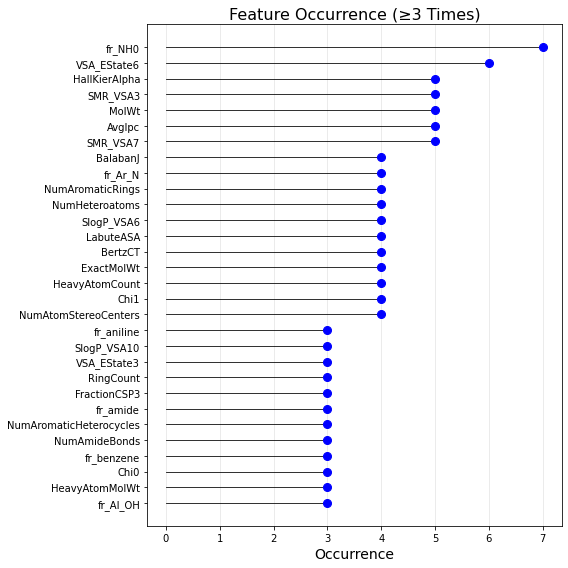

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# List of CSV files
csv_files = [
    "top_30_features_svr_sigmoid.csv",  
    "top_30_features_svr_rbf.csv",
    "top_30_features_svr_linear.csv",
    "top_30_features_svr_poly.csv",
    "best_features_nn.csv",
    "best_features_XGBoost.csv",
    "best_features_RF.csv"
]

# Initialize a Counter to track feature occurrences
feature_counter = Counter()

# Read each CSV file and update the counter with feature occurrences
for file in csv_files:
    df = pd.read_csv(file)
    features = df['Feature']
    feature_counter.update(features)

# Convert the counter to a DataFrame
occurrence_df = pd.DataFrame(feature_counter.items(), columns=["Feature", "Occurrence"])

# Filter for features that occurred at least 3 times
filtered_df = occurrence_df[occurrence_df['Occurrence'] >= 3]

# Sort by occurrence in descending order
filtered_df = filtered_df.sort_values(by="Occurrence", ascending=False)

# Save the filtered results to a CSV file
output_csv = "filtered_feature_occurrence_summary.csv"
filtered_df.to_csv(output_csv, index=False)
print(f"Filtered feature occurrence summary saved to {output_csv}")

# Plotting the bar graph
plt.figure(figsize=(8, 8))
y_positions = range(len(filtered_df))

# Draw horizontal bars and blue markers
for i, (feature, occurrence) in enumerate(zip(filtered_df['Feature'], filtered_df['Occurrence'])):
    plt.plot([0, occurrence], [i, i], 'k-', lw=0.8)  # Black line
    plt.plot(occurrence, i, 'bo', markersize=8)       # Blue marker at the end

plt.yticks(y_positions, filtered_df['Feature'])
plt.gca().invert_yaxis()  # Most frequent features at the top
plt.xlabel("Occurrence", fontsize=14)
plt.title("Feature Occurrence (≥3 Times)", fontsize=16)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Save the plot
plot_filename = "filtered_feature_occurrence_bar_graph.png"
plt.savefig(plot_filename, dpi=600)
print(f"Filtered feature occurrence bar graph saved to {plot_filename}")

plt.show()


In [3]:
import pandas as pd
from collections import defaultdict



# List of CSV files
csv_files = [
    "top_30_features_svr_sigmoid.csv",  
    "top_30_features_svr_rbf.csv",
    "top_30_features_svr_linear.csv",
    "top_30_features_svr_poly.csv",
    "best_features_nn.csv",
    "best_features_XGBoost.csv",
    "best_features_RF.csv"
]

# Dictionary to track features, occurrences, and the files they appear in
feature_tracker = defaultdict(lambda: {"Occurrence": 0, "Files": []})

# Process each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    features = df['Feature']
    for feature in features:
        feature_tracker[feature]["Occurrence"] += 1
        feature_tracker[feature]["Files"].append(file)

# Convert the feature tracker to a DataFrame
results = []
for feature, data in feature_tracker.items():
    results.append({
        "Feature": feature,
        "Occurrence": data["Occurrence"],
        "File Name": ", ".join(data["Files"])  # Combine file names into a single string
    })

feature_occurrence_df = pd.DataFrame(results)

# Sort by descending order of occurrences
feature_occurrence_df = feature_occurrence_df.sort_values(by="Occurrence", ascending=False)

# Save to CSV
output_csv = "feature_occurrence_sorted.csv"
feature_occurrence_df.to_csv(output_csv, index=False)
print(f"Feature occurrence summary with file names saved to {output_csv}")

Feature occurrence summary with file names saved to feature_occurrence_sorted.csv
